$G(x, y) = A \, e^{-\left( \frac{(x - x_0)^2}{2\sigma_x^2} + \frac{(y - y_0)^2}{2\sigma_y^2} \right)} + B$
$L(x, y) = \frac{A}{1 + \frac{(x - x_0)^2}{\gamma_x^2} + \frac{(y - y_0)^2}{\gamma_y^2}}$

In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("/Users/omarhaji/Downloads/A1data.csv")
pump = np.array(data['Pump'])
probe = np.array(data['Probe'])
signal = np.array(data['Signal'])

In [31]:
pump_mean = np.mean(pump)
probe_mean = np.mean(probe)
max_signal = signal[np.argmax(signal)]
print(f"Mean pump  : {pump_mean}")
print(f"Mean probe : {probe_mean}")
print(f"Signal Max : {max_signal}")

Mean pump  : 1599.5
Mean probe : 1699.5
Signal Max : 2.191368676


Gaussian Fit Parameters:
A = 1.6970294130363845 ± 0.0024720822854862826
x0 = 1599.9892907591566 ± 0.02956679041662973
y0 = 1680.9443097198614 ± 0.07267938340186444
sigma_x = 20.647387482045307 ± 0.030209186260155254
sigma_y = 48.91221224990099 ± 0.0796641593463074

Lorentzian Fit Parameters:
A = 2.1451557249190745 ± 0.003387561085704648
x0 = 1599.9995036677117 ± 0.02206246392239559
y0 = 1679.7626228479296 ± 0.05609157478504783
gamma_x = 16.86200903217109 ± 0.03085197398202627
gamma_y = 42.178465411343474 ± 0.08318644411639028


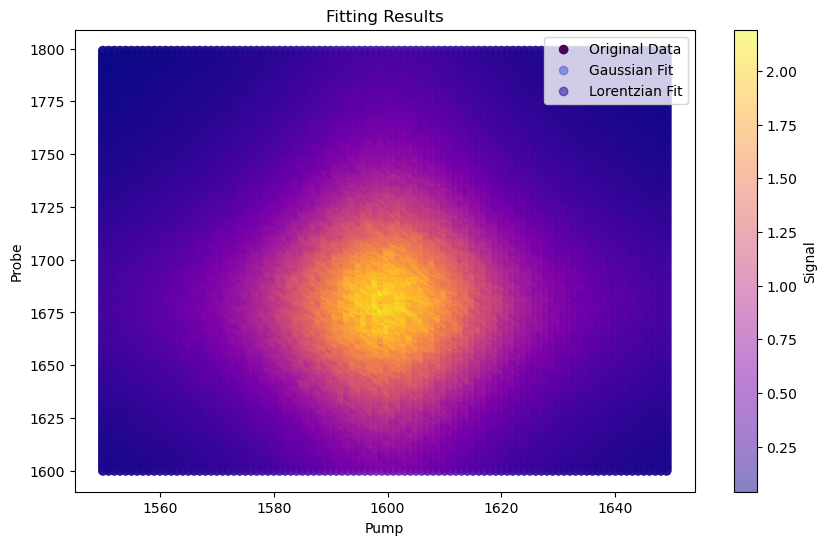

In [5]:

def gaussian_2d(coords, A, x0, y0, sigma_x, sigma_y):
    x, y = coords
    return A * np.exp(-((x - x0)**2 / (2 * sigma_x**2) + (y - y0)**2 / (2 * sigma_y**2)))


def lorentzian_2d(coords, A, x0, y0, gamma_x, gamma_y):
    x, y = coords
    return A / (1 + ((x - x0) / gamma_x)**2 + ((y - y0) / gamma_y)**2)


coords = np.array([pump, probe])

# Initial guesses 
p0_gaussian = [np.max(signal), np.mean(pump), np.mean(probe), 1, 1]
p0_lorentzian = [np.max(signal), np.mean(pump), np.mean(probe), 1, 1]

# Gaussian fit
params_gaussian, cov_gaussian = curve_fit(gaussian_2d, coords, signal, p0=p0_gaussian)

#  Lorentzian fit
params_lorentzian, cov_lorentzian = curve_fit(lorentzian_2d, coords, signal, p0=p0_lorentzian)

# Extract fitted parameters and errors
errors_gaussian = np.sqrt(np.diag(cov_gaussian))
errors_lorentzian = np.sqrt(np.diag(cov_lorentzian))

# Print the results
print("Gaussian Fit Parameters:")
print("A =", params_gaussian[0], "±", errors_gaussian[0])
print("x0 =", params_gaussian[1], "±", errors_gaussian[1])
print("y0 =", params_gaussian[2], "±", errors_gaussian[2])
print("sigma_x =", params_gaussian[3], "±", errors_gaussian[3])
print("sigma_y =", params_gaussian[4], "±", errors_gaussian[4])

print("\nLorentzian Fit Parameters:")
print("A =", params_lorentzian[0], "±", errors_lorentzian[0])
print("x0 =", params_lorentzian[1], "±", errors_lorentzian[1])
print("y0 =", params_lorentzian[2], "±", errors_lorentzian[2])
print("gamma_x =", params_lorentzian[3], "±", errors_lorentzian[3])
print("gamma_y =", params_lorentzian[4], "±", errors_lorentzian[4])

# Generate fitted data for visualization
fit_gaussian = gaussian_2d(coords, *params_gaussian)
fit_lorentzian = lorentzian_2d(coords, *params_lorentzian)

# Plot the original data and the fits
plt.figure(figsize=(10, 6))

# Original data
plt.scatter(pump, probe, c=signal, label='Original Data', cmap='viridis')

# Gaussian fit
plt.scatter(pump, probe, c=signal, label='Gaussian Fit', cmap='coolwarm', alpha=0.5)

# Lorentzian fit
plt.scatter(pump, probe, c=signal, label='Lorentzian Fit', cmap='plasma', alpha=0.5)

plt.xlabel('Pump')
plt.ylabel('Probe')
plt.title('Fitting Results')
plt.colorbar(label='Signal')
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


R-squared for Gaussian Fit: 0.9514350646314017
R-squared for Lorentzian Fit: 0.9698734517241422


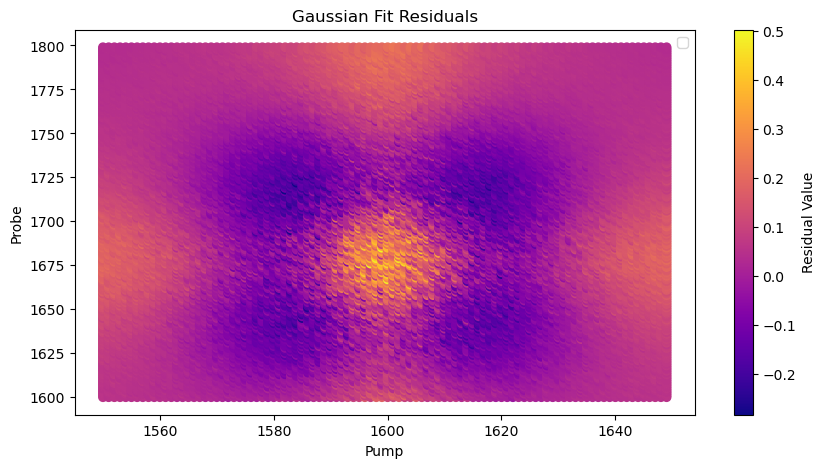

In [25]:
# Calculate residuals
residuals_gaussian = signal - gaussian_2d(coords, *params_gaussian)
residuals_lorentzian = signal - lorentzian_2d(coords, *params_lorentzian)

# Calculate RSS and TSS
rss_gaussian = np.sum(residuals_gaussian**2)
rss_lorentzian = np.sum(residuals_lorentzian**2)
tss = np.sum((signal - np.mean(signal))**2)

# Calculate R-squared
r2_gaussian = 1 - (rss_gaussian / tss)
r2_lorentzian = 1 - (rss_lorentzian / tss)

# Print R-squared values
print("R-squared for Gaussian Fit:", r2_gaussian)
print("R-squared for Lorentzian Fit:", r2_lorentzian)

# Plot residuals
fig = plt.figure(figsize=(10, 5))
plt.scatter(pump, probe, c=residuals_gaussian, cmap='plasma')
plt.colorbar(label='Residual Value')
plt.title("Gaussian Fit Residuals")
plt.xlabel('Pump')
plt.ylabel('Probe')
plt.legend()
plt.show()
fig.savefig("/Users/omarhaji/Downloads/gaussian_fit_residuals.png",dpi =300)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


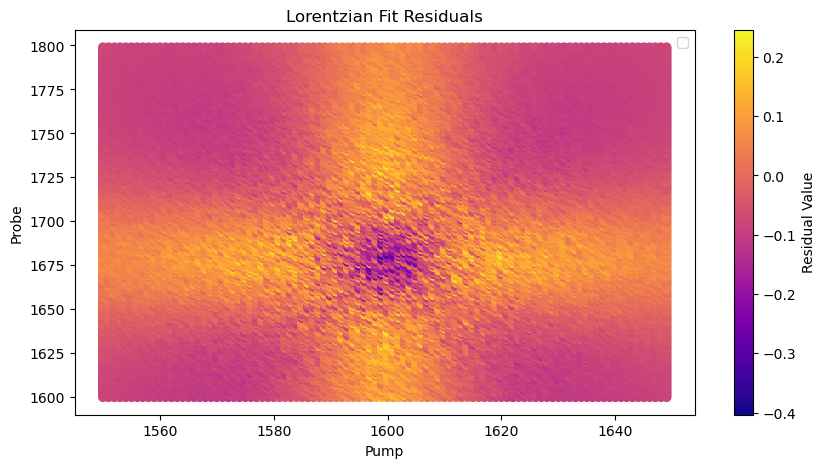

In [23]:

fig = plt.figure(figsize=(10, 5))
plt.scatter(pump, probe, c=residuals_lorentzian, cmap='plasma')
plt.colorbar(label='Residual Value')
plt.title("Lorentzian Fit Residuals")
plt.xlabel('Pump')
plt.ylabel('Probe')
plt.legend()
plt.show()
fig.savefig("/Users/omarhaji/Downloads/lorentzian_fit_residuals.png",dpi =300)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


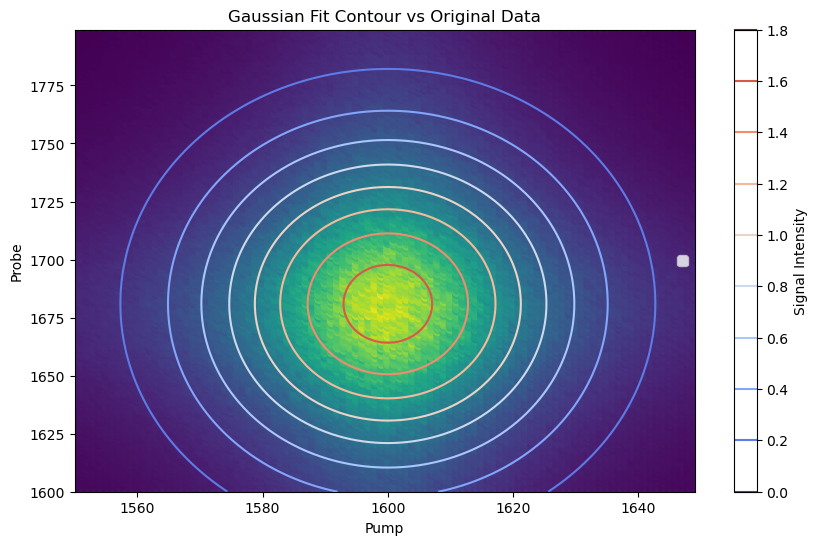

In [17]:
# Create a grid for contour plots
x_grid = np.linspace(np.min(pump), np.max(pump), 100)
y_grid = np.linspace(np.min(probe), np.max(probe), 100)
X, Y = np.meshgrid(x_grid, y_grid)

# Compute Gaussian and Lorentzian values over the grid
Z_gaussian = gaussian_2d((X, Y), *params_gaussian)
Z_lorentzian = lorentzian_2d((X, Y), *params_lorentzian)

# Plot original data with Gaussian fit contours
fig = plt.figure(figsize=(10, 6))
plt.scatter(pump, probe, c=signal, cmap='viridis', alpha=0.7)
plt.contour(X, Y, Z_gaussian, levels=10, cmap='coolwarm')
plt.colorbar(label='Signal Intensity')
plt.title('Gaussian Fit Contour vs Original Data')
plt.xlabel('Pump')
plt.ylabel('Probe')
plt.legend()
plt.show()
fig.savefig("/Users/omarhaji/Downloads/gaussian_2d_contour.png",dpi =300)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


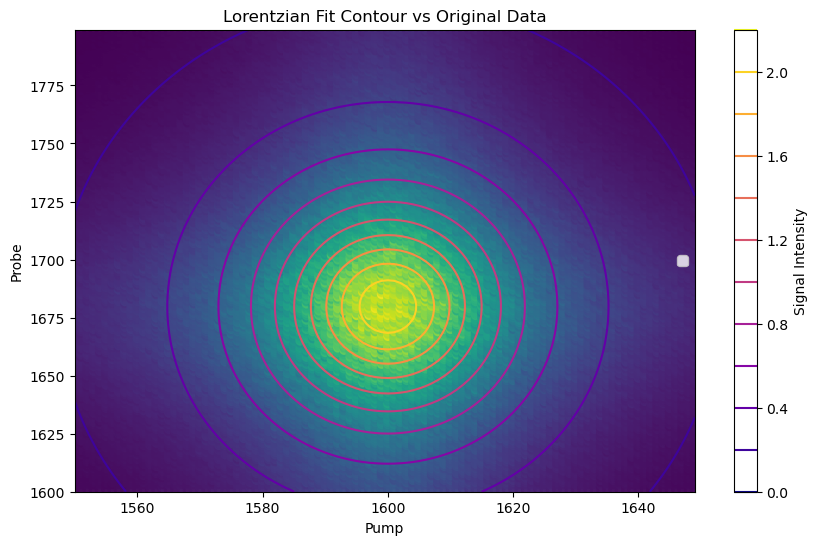

In [21]:
fig = plt.figure(figsize=(10, 6))
plt.scatter(pump, probe, c=signal, cmap='viridis', alpha=0.7)
plt.contour(X, Y, Z_lorentzian, levels=10, cmap='plasma')
plt.colorbar(label='Signal Intensity')
plt.title('Lorentzian Fit Contour vs Original Data')
plt.xlabel('Pump')
plt.ylabel('Probe')
plt.legend()
plt.show()
fig.savefig("/Users/omarhaji/Downloads/lorentzian_2d_contour.png",dpi =300)

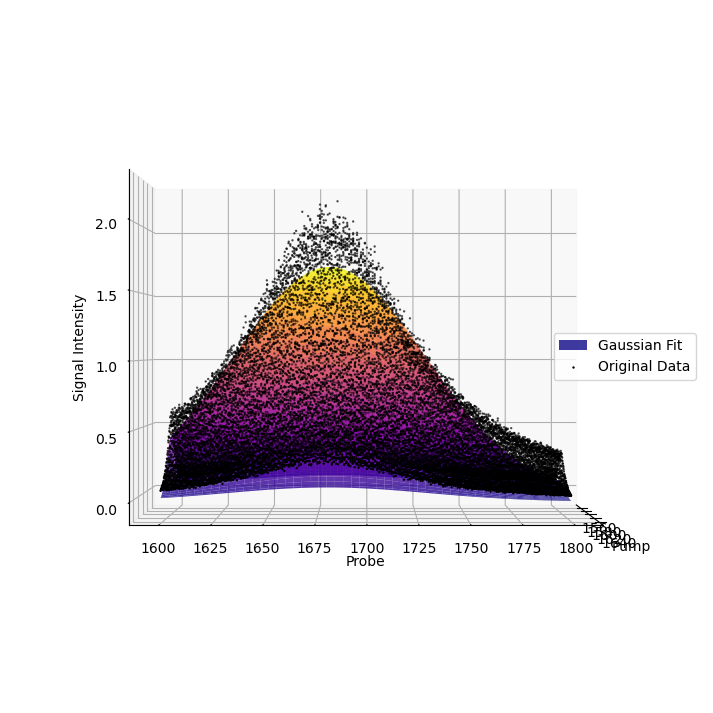

In [95]:
from mpl_toolkits.mplot3d import Axes3D

# Plot the Gaussian fit in 3D
fig = plt.figure(figsize=(10, 9))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z_gaussian, cmap='plasma', alpha=0.8, label='Gaussian Fit')
ax.scatter(pump, probe, signal, c='black', marker='o', label='Original Data', s=0.5)
#ax.set_title('3D Gaussian Fit vs Original Data', pad =-500)
ax.set_xlabel('Pump')
ax.set_ylabel('Probe')
ax.set_zlabel('Signal Intensity')
ax.view_init(elev=0, azim=0)
ax.legend(loc='center right')
plt.show()

fig.savefig("/Users/omarhaji/Downloads/gaussian.png",dpi =300,bbox_inches = 'tight')

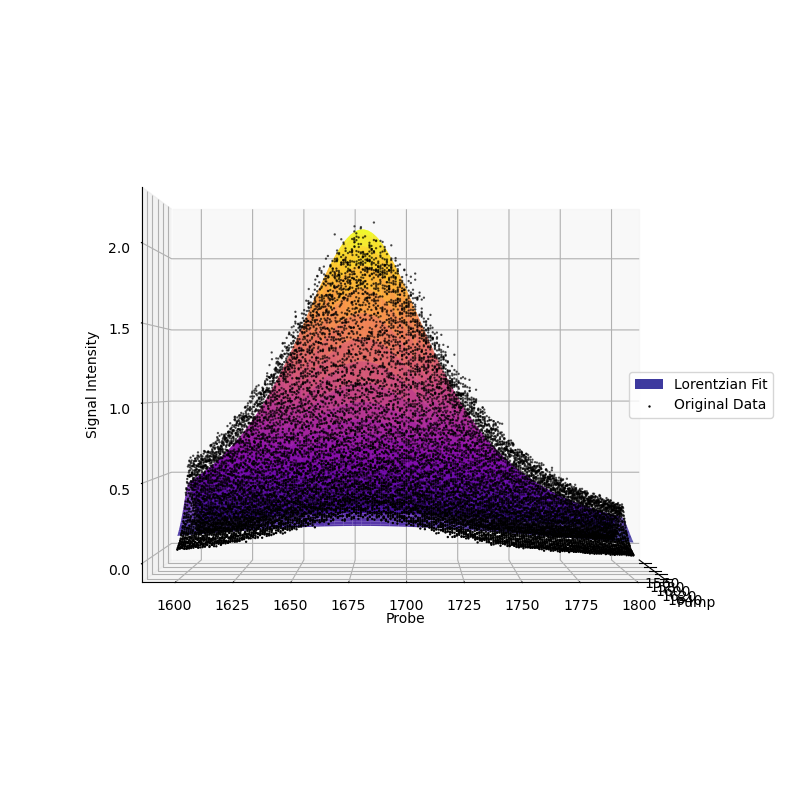

In [97]:

# Plot the Lorentzian fit in 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z_lorentzian, cmap='plasma', alpha=0.8, label='Lorentzian Fit')
ax.scatter(pump, probe, signal, c='black', marker='o', label='Original Data', s=0.5)
#ax.set_title('3D Lorentzian Fit vs Original Data')
ax.set_xlabel('Pump')
ax.set_ylabel('Probe')
ax.set_zlabel('Signal Intensity')
ax.view_init(elev=0, azim=0)
ax.legend(loc = 'center right')
plt.show()
fig.savefig("/Users/omarhaji/Downloads/lorentz.png",dpi =300)

In [103]:
# Compute residuals
fit_gaussian = gaussian_2d(coords, *params_gaussian)
fit_lorentzian = lorentzian_2d(coords, *params_lorentzian)

# RSS
RSS_gaussian = np.sum((signal - fit_gaussian)**2)
RSS_lorentzian = np.sum((signal - fit_lorentzian)**2)

# Degrees of freedom
nu_gaussian = len(signal) - 5
nu_lorentzian = len(signal) - 5

# Reduced Chi-Squared
reduced_chi_squared_gaussian = RSS_gaussian / nu_gaussian
reduced_chi_squared_lorentzian = RSS_lorentzian / nu_lorentzian

print("Reduced Chi-Squared (Gaussian):", reduced_chi_squared_gaussian)
print("Reduced Chi-Squared (Lorentzian):", reduced_chi_squared_lorentzian)




Reduced Chi-Squared (Gaussian): 0.009200531527817777
Reduced Chi-Squared (Lorentzian): 0.005707415342625504


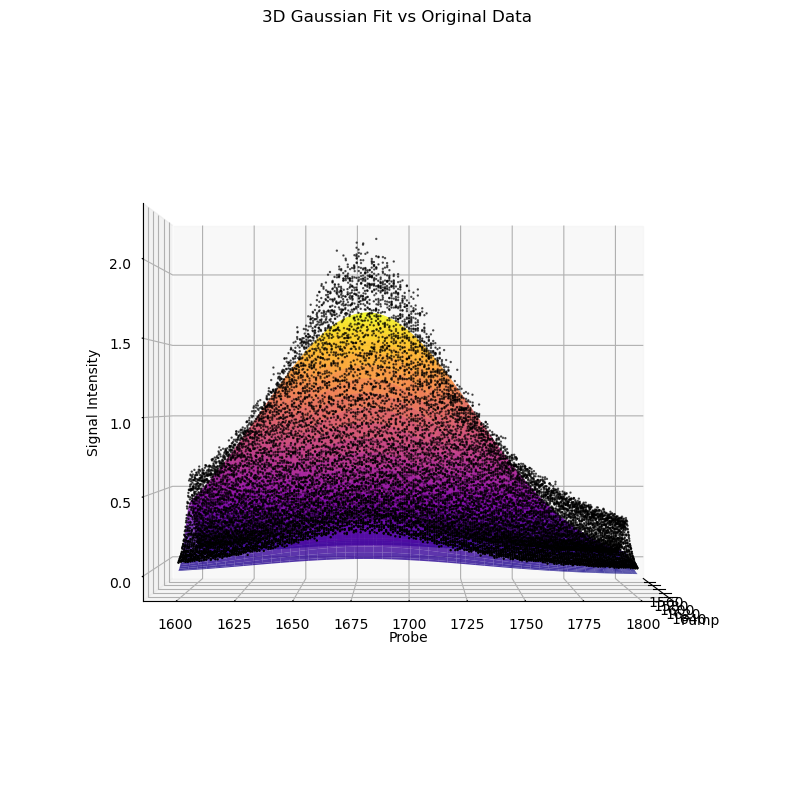

In [65]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot data
ax.plot_surface(X, Y, Z_gaussian, cmap='plasma', alpha=0.8, label='Gaussian Fit')
ax.scatter(pump, probe, signal, c='black', marker='o', label='Original Data', s=0.5)

# Title and labels
ax.set_title('3D Gaussian Fit vs Original Data', pad=-20)  # Reduce pad further
ax.set_xlabel('Pump')
ax.set_ylabel('Probe')
ax.set_zlabel('Signal Intensity')

# Adjust viewing angle
ax.view_init(elev=0, azim=0)

# Adjust the layout to reduce white space
fig.subplots_adjust(top=0.9)  # Adjust top margin to bring the title closer

# Show and save the figure
plt.show()
#fig.savefig("/Users/omarhaji/Downloads/gaussian.png", dpi=300, bbox_inches='tight')


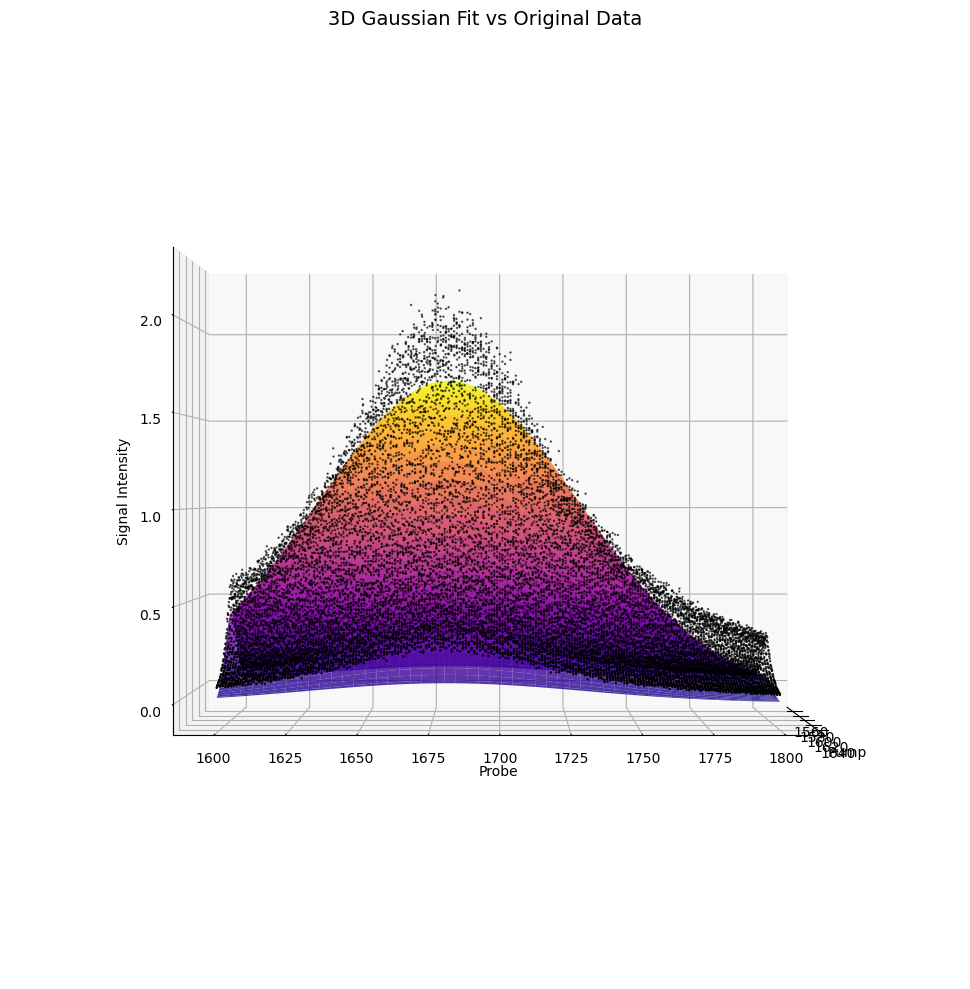

In [79]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot data
ax.plot_surface(X, Y, Z_gaussian, cmap='plasma', alpha=0.8, label='Gaussian Fit')
ax.scatter(pump, probe, signal, c='black', marker='o', label='Original Data', s=0.5)

# Title and labels
ax.set_title('3D Gaussian Fit vs Original Data', pad=-20, fontsize=14)  # Adjust padding
ax.set_xlabel('Pump')
ax.set_ylabel('Probe')
ax.set_zlabel('Signal Intensity')

# Adjust viewing angle
ax.view_init(elev=0, azim=0)

# Manually adjust layout to control spacing
fig.subplots_adjust(top=0.85)  # Bring title closer to the plot
fig.tight_layout()  # Automatically adjust padding (works for 3D too)

# Show and save the figure
plt.show()
#fig.savefig("/Users/omarhaji/Downloads/gaussian.png", dpi=300, bbox_inches='tight')
